<a href="https://colab.research.google.com/github/anagha102/Predict-The-Cancer-Death-Rate-For-Given-Year/blob/main/Predict_the_Cancer_Death_Rate_for_Given_Year_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda:**
1. About the Dataset

2. Objective

3. Importing Libraries

4. Importing Data

5. Exploratory Data Analysis

6. Splitting Data into Train and Test Set

7. Data Preprocessing

8. Train the model :

      A. Define the model. B. Compile the model. C. Fit the model. D. Evaluate the model 

9. Trying and doing same tasks with another model

10. Conclusion

## **About the Dataset**

The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

1. TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer 
mortalities(a)
2. avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
3. avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
4. incidenceRate: Mean per capita (100,000) cancer diagoses(a)
5. medianIncome: Median income per county (b)
6. popEst2015: Population of county (b)
7. povertyPercent: Percent of populace in poverty (b)
8. studyPerCap: Per capita number of cancer-related clinical trials per county (a)
9. binnedInc: Median income per capita binned by decile (b)
10. MedianAge: Median age of county residents (b)
11. MedianAgeMale: Median age of male county residents (b)
11. MedianAgeFemale: Median age of female county residents (b)
12. Geography: County name (b)
13. AvgHouseholdSize: Mean household size of county (b)
14. PercentMarried: Percent of county residents who are married (b)
15. PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
16. PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
17. PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
18. PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
19. PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
20. PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
21. PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
22. PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
23. PctPrivateCoverage: Percent of county residents with private health coverage (b)
24. PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
25. PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
26. PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
27. PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
28. PctWhite: Percent of county residents who identify as White (b)
29. PctBlack: Percent of county residents who identify as Black (b)
30. PctAsian: Percent of county residents who identify as Asian (b)
31. PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
32. PctMarriedHouseholds: Percent of married households (b)
33. BirthRate: Number of live births relative to number of women in county (b)
(a): years 2010-2016
(b): 2013 Census Estimates

## **Objective**

To build a machine learning  model that would predict the cancer death rate for the given year.

## **Importing Libraries**

In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set
from sklearn import metrics  #For evaluationn
from sklearn.metrics import mean_squared_error, r2_score 

## **Importing data**

In [2]:
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

In [3]:
data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


## **Exploratory Data Analysis**

In [4]:
data.shape

(3051, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

There are 2 categorical variables - binnedInc and Geography and the rest are numeric variables

In [6]:
data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [7]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

c

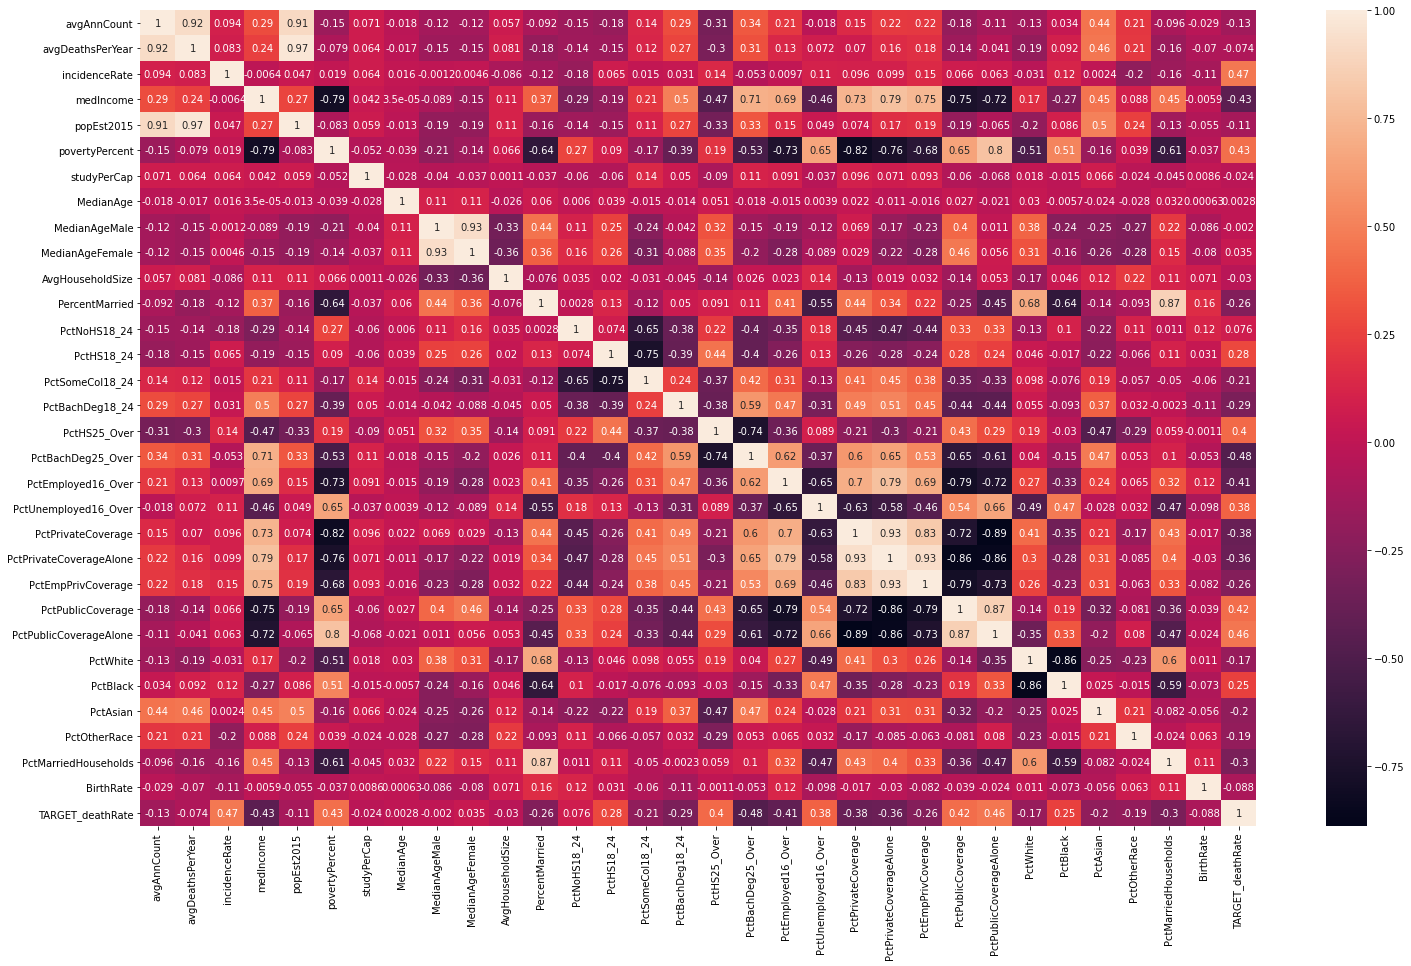

In [8]:
plt.figure(figsize = (25, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

From plot we can conclude that cancer death rate is:

1. Positively correlated with incidenceRate, poverty percentage, Median ages of females, PctNoHS18_24, percentage of unemployed people, percentage of people with government provided heathcare, people who identify their ethnicity as black.
2. Negatively correlated with population of county, percentMarried, PctSomeCol18_24,PctSomeDeg18_24,PctBachDeg25_Over, percentage of employed people, people with some or only private health coverage, people with employee private coverage, Married households and other ethinicities.

**Check the distribution of each feature**

Text(0.5, 1.0, 'Histograms - Distribution of data')

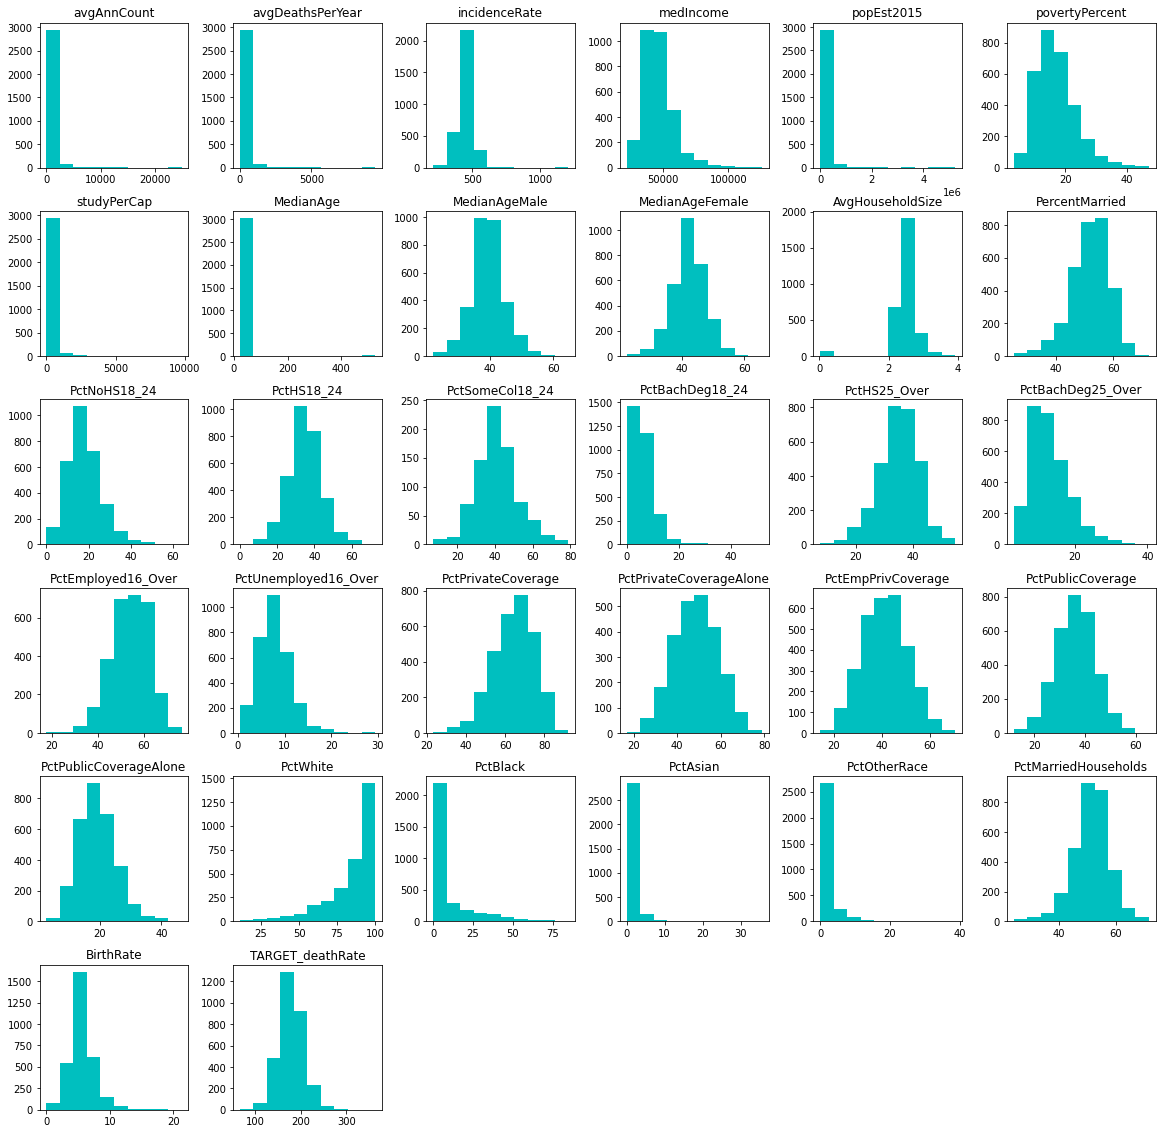

In [9]:
data.hist(figsize=(20,20),color='c',grid=False);
plt.title("Histograms - Distribution of data")

We can see that not all variables have a normal distribution. Many variables show skewness. Apart from that, the values of columns are on different scales.

**Separating the Input and Target Features of the data**

In [10]:
X = data.drop(['TARGET_deathRate'],axis=1)   
y = data['TARGET_deathRate']

In [11]:
X.shape

(3051, 33)

## **Split the data into Train and Test Sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Performing Data Preparation Steps**

For training and test data:

1. Drop irrelevant columns
2. Missing Value Imputation
3. Feature Scaling

In [13]:
X_train.drop(columns = ['binnedInc','Geography'],axis=1,inplace=True)

In [14]:
X_train=X_train.drop(['PctSomeCol18_24'],axis=1)  #droping this column as its contain most of na values

In [15]:
X_train['PctEmployed16_Over']=X_train.fillna(X_train['PctEmployed16_Over'].mean())       #replacing na values with column's mean value
X_train['PctPrivateCoverageAlone']=X_train.fillna(X_train['PctPrivateCoverageAlone'].mean())

In [16]:
#std-scaling - fit-transform 
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train= std_scale.transform(X_train)

After standardization, our data has comparable values, with their mean centered around 0

**Performing same task on test data**

In [17]:
X_test.drop(columns = ['binnedInc','Geography'],axis=1,inplace=True)

In [18]:
X_test=X_test.drop(['PctSomeCol18_24'],axis=1) 

In [19]:
X_test['PctEmployed16_Over']=X_test.fillna(X_test['PctEmployed16_Over'].mean())
X_test['PctPrivateCoverageAlone']=X_test.fillna(X_test['PctPrivateCoverageAlone'].mean())

In [20]:
#std-scaling - fit-transform 
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_test)
X_test= std_scale.transform(X_test)

## **Build the Model**

In [21]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)

In [23]:
print("Train set:")
print("Mean absolute error = ", metrics.mean_absolute_error(train_pred_lr, y_train))
print("Mean squared error = ", metrics.mean_squared_error(train_pred_lr, y_train))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(train_pred_lr, y_train)))
print("R2 score = ", metrics.r2_score(train_pred_lr, y_train))

print("\nTest set:")
print("Mean absolute error = ", metrics.mean_absolute_error(test_pred_lr, y_test))
print("Mean squared error = ", metrics.mean_squared_error(test_pred_lr, y_test))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(test_pred_lr, y_test)))
print("R2 score = ", metrics.r2_score(test_pred_lr, y_test))

Train set:
Mean absolute error =  13.876351315405888
Mean squared error =  356.47016549165346
Root Mean squared error =  18.88041751370063
R2 score =  0.08100202676194301

Test set:
Mean absolute error =  14.576742985267884
Mean squared error =  384.10954723322914
Root Mean squared error =  19.59871289736214
R2 score =  -0.0030965718655817653


## **Trying other Machine Learning Models and Evaluating them**

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=2)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [25]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [26]:
print("Train set:")
print("Mean absolute error = ", metrics.mean_absolute_error(train_pred, y_train))
print("Mean squared error = ", metrics.mean_squared_error(train_pred, y_train))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(train_pred, y_train)))
print("R2 score = ", metrics.r2_score(train_pred, y_train))

print("\nTest set:")
print("Mean absolute error = ", metrics.mean_absolute_error(test_pred, y_test))
print("Mean squared error = ", metrics.mean_squared_error(test_pred, y_test))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(test_pred, y_test)))
print("R2 score = ", metrics.r2_score(test_pred, y_test))

Train set:
Mean absolute error =  3.7443327868852325
Mean squared error =  30.38404634344256
Root Mean squared error =  5.512172561108964
R2 score =  0.9476438632335827

Test set:
Mean absolute error =  12.197297872340425
Mean squared error =  299.55255529787223
Root Mean squared error =  17.307586639906564
R2 score =  0.1422099091224921


### Performing Hyperparameter Tuning

In [27]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True],'max_depth': [10, 20],'min_samples_leaf': [3, 4],'min_samples_split': [4, 6],'n_estimators': [100, 200]}
cv = GridSearchCV(rf, parameters, cv=3, n_jobs=-1, verbose=2)
cv.fit(X_train, y_train)
print_results(cv)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.0min finished


BEST PARAMS: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}

0.612 (+/-0.013) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.614 (+/-0.015) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
0.612 (+/-0.013) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}
0.614 (+/-0.015) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}
0.608 (+/-0.01) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.609 (+/-0.012) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.608 (+/-0.01) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}
0

In [29]:
train_pred_grid = cv.predict(X_train)

# for test set
test_pred_grid = cv.predict(X_test)

In [30]:
print("GridSearchCV\n")
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(train_pred_grid, y_train))
print("MSE: ", metrics.mean_squared_error(train_pred_grid, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(train_pred_grid, y_train)))
print("R2 score: ", metrics.r2_score(train_pred_grid, y_train))


# for testing data
print("\nTesting data")
print("MAE: ", metrics.mean_absolute_error(test_pred_grid, y_test))
print("MSE: ", metrics.mean_squared_error(test_pred_grid, y_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_pred_grid, y_test)))
print("R2 score: ", metrics.r2_score(test_pred_grid, y_test))

GridSearchCV

Training data
MAE:  4.930697235387184
MSE:  58.730880905416974
RMSE:  7.663607564679769
R2 score:  0.8877546237317798

Testing data
MAE:  12.436593176763362
MSE:  302.86902916135864
RMSE:  17.40313273986493
R2 score:  0.11801033663861027


As we can see mean square error increases and R^2 decreases after performing hyper parameter tuning. So we will perform further operations on first random forest model.

**Using Feature Selection Technique and observing if the model created by selected features performs better than the previous model**

In [31]:
!pip install boruta

     |████████████████████████████████| 61kB 5.5MB/s 


In [32]:
from boruta import BorutaPy
rfc = RandomForestRegressor(random_state=1)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	3
Rejected: 	4
I

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=70, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F35EBE739E0,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

In [33]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True]
Ranking:  [4 1 1 1 1 1 6 2 1 1 1 1 1 1 1 1 1 4 1 1 3 1 1 1 1 1 1 1 1 1]
No. of significant features:  25


In [34]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [35]:
# Creating a new random forest regressor for the most important features
rf_important = RandomForestRegressor(random_state=2, n_estimators=1000, n_jobs = -1)

# Training the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [36]:
# predicting on the transformed train data
train_pred_boruta = rf_important.predict(X_important_train)

# predicting on the transformed test data
test_pred_boruta = rf_important.predict(X_important_test)

In [37]:
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(train_pred_boruta, y_train))
print("MSE: ", metrics.mean_squared_error(train_pred_boruta, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(train_pred_boruta, y_train)))
print("R2 score: ", metrics.r2_score(train_pred_boruta, y_train))


# for testing data
print("\nTesting data")
print("MAE: ", metrics.mean_absolute_error(test_pred_boruta, y_test))
print("MSE: ", metrics.mean_squared_error(test_pred_boruta, y_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_pred_boruta, y_test)))
print("R2 score: ", metrics.r2_score(test_pred_boruta, y_test))

Training data
MAE:  3.710574262295073
MSE:  29.606276332221082
RMSE:  5.44116497932392
R2 score:  0.9489394915803788

Testing data
MAE:  12.354867921440235
MSE:  302.63525847409136
RMSE:  17.396415104098068
R2 score:  0.11939306943724537


###Model Performance Comparison

In [39]:
models = {'Logistic Regression': lr, 'Random Forest Regression': rf,  'Random forest with hyper parameter tuning' : cv, 'Random Forest with Boruta Selector': rf_important}

test_data = [X_test, X_test, X_test, X_important_test]
model_performance = []
exp = 1
for key, value in models.items():
  model_performance.append([exp, key, mean_squared_error(y_test, value.predict(test_data[exp-1])), r2_score(y_test, value.predict(test_data[exp-1]))])
  exp += 1

In [40]:
df = pd.DataFrame(model_performance, columns=['Experiment no.:', 'Experiment name', 'MSE', 'R^2'])
df

,Experiment no.:,Experiment name,MSE,R^2
0,1,Logistic Regression,384.109547,0.532497
1,2,Random Forest Regression,299.552555,0.635412
2,3,Random forest with hyper parameter tuning,302.869029,0.631375
3,4,Random Forest with Boruta Selector,302.635258,0.631660


## **Conclusion**

Random Forest Regression gives us better prediction with 299.55 MSE and 0.63 R^2 value.